# HW 6_1 - Tim Demetriades
10/8/2021

### 1. What are the advantages of a CNN over a fully connected deep neural network for image classification?

There are a number of advantages to using a Convolutional Neural Network (CNN) over fully connected deep neural networks for image classification. Although fully connected deep neural networks can be used for many uses-cases including image classification, they are very general and not very good at feature extraction like CNNs. CNNs are trained to identify and extract the best features from images. CNNs are much more specialized and efficient at image classification. 

Fully connected deep neural networks use every node in the network. This is fine for small images but for very large images this can be very memory and process intensive. In CNNs, the convolution layer reduces the number of input nodes for the next layer. Furthermore, the pooling layers even further reduce the dimensionality. Instead of considering all of the pixels in the image, you are now only considering chunks of the image at a time.

Another advatage is that CNNs can tolerate small shifts in where the pixels are in the image. The subject of the image may not always be in the same position and can even be rotated. More specifically, it can handle translation invariance. A normal fully connected deep neural network may not be able to classify this as the same object, but a CNN can.

One final advantage of CNNs is that they can take advantage of the correlation that complex images may have. In many images you will have regions of the same color. Instead of considering all of the individual pixels, CNNs apply a filter which look at regions of pixels instead of just one pixel at a time.

### 2. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride? 

One advantage of using max pooling is that it can handle translation invariance, as mentioned in answer to the previous question. Pooling also reduces the number of nodes which can make the convolutions faster and more efficient.

The point of using the convolution layers is to match identical features between different images. Although it will reduce the number of nodes, that is mainly the job of the max pooling layers. The max pooling layers reduce the size of the image which can decrease computational complexity and reduce noise. Therefore, both should be used for different reasons. The convolution layers should feed into the max pooling layers.

### 3. When would you want to add a local response normalization layer?

As the name implies, these layers are used to add normalization to the model. These normalization layers can add a sort of inhibition scheme. Inhibition schemes are similar to the concept of lateral inhibition in neurobiology. Basically, with lateral inhibition, the sensory perception is increased by having excited neurons subdue its neighbors, created a local maxima and a contrast in that area.

This concept is implemented with local response normalization layers by normalizing the area around the local neighborhood of the excited neuron (node), making it become even more sensitive as compared to its neighbors. This allows you to detect high frequency features with a large response. Conversally, the responses that are uniformly large in any given local neighborhood will be dampened. The goal here is to boost the neurons with relatively large activations while dampening the rest.

### 4. Test below CNN codes with MNIST data set and show the model accuracy.

First import needed modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

Set random seed to 25.

In [5]:
np.random.seed(25)

Load mnist data (digits).

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Show first digit and class.

Text(0.5, 1.0, 'Class 5')

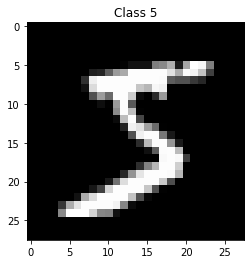

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [8]:
X_train.shape

(60000, 28, 28)

Reshape x_train and x_test, convert to float, and divide by 255.

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

Convert class vectors to binary class matrices.

In [27]:
print(y_train.shape)
y_train

(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
print(Y_train.shape)
Y_train

(60000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

**There are three steps to Convolution**
1. Convolution
2. Activation
3. Pooling

Repeat steps 1, 2, and 3 for adding more hidden layers. After that make a fully connected network. This fully connected network gives the ability to the CNN to classify the samples.

In [30]:
model = Sequential()                                      # define sequential model

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))      # convolution
model.add(Activation('relu'))                             # activation
BatchNormalization(axis=-1)                               # batch normalization
model.add(Conv2D(32, (3, 3)))                             # convolution
model.add(Activation('relu'))                             # activation
model.add(MaxPooling2D(pool_size=(2,2)))                  # pooling

In [31]:
BatchNormalization(axis=-1)                               # batch normalization
model.add(Conv2D(64,(3, 3)))                              # convolution
model.add(Activation('relu'))                             # activation
BatchNormalization(axis=-1)                               # batch normalization
model.add(Conv2D(64, (3, 3)))                             # convolution
model.add(Activation('relu'))                             # activation
model.add(MaxPooling2D(pool_size=(2,2)))                  # pooling

In [32]:
model.add(Flatten())                                      # flatten for fully connected layer

In [33]:
# Fully connected layer
BatchNormalization()                                      # batch normalization
model.add(Dense(512))                                     # dense layer
model.add(Activation('relu'))                             # activation
BatchNormalization()                                      # batch normalization
model.add(Dropout(0.2))                                   # dropout
model.add(Dense(10))                                      # dense layer (10 classes)

In [34]:
# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

Summarize model layers.

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 10, 10, 64)       

Configure the model for training.

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Generate batches of tensor image data with real-time data augmentation.

In [37]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

Take data and label arrays and generate batches of augmented data.

In [41]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

Fit the model on data yielded batch-by-batch by a Python generator.

In [43]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)

C:\Users\timjr\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
937/937 [==============================] - 47s 50ms/step - loss: 0.1991 - accuracy: 0.9369 - val_loss: 0.0317 - val_accuracy: 0.9904
Epoch 2/5
937/937 [==============================] - 46s 49ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0526 - val_accuracy: 0.9840
Epoch 3/5
937/937 [==============================] - 49s 52ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0248 - val_accuracy: 0.9920
Epoch 4/5
937/937 [==============================] - 45s 48ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0190 - val_accuracy: 0.9931
Epoch 5/5
937/937 [==============================] - 45s 48ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0190 - val_accuracy: 0.9938


Print model test accuracy using test data.

In [44]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0190 - accuracy: 0.9938

Test accuracy:  0.9937999844551086


Make predictions using model and test data. Output predictions to a csv.

In [47]:
predictions = model.predict(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

The above model is a **CNN** made up of several hidden layers. The hidden layers involve convolution, activation, pooling, normalization, and fully connected layers. The data set used here is the mnist data set which comprises of 60,000 numeric digits from 0-9 in the training set and 10,000 in the testing set.

After the data is prepared, the model is setup and trained using the training data and python generators. The training only uses 5 epochs, but this is more than sufficient. As can be seen from the results, the first epoch already has a **validation loss of only 0.0317 and validation accuracy of 99.04%**. By the 5th epoch, these values are down to **0.019 and 99.38** respectively.

The model is evaluated on the test data and a test accuracy of 99.38% is achieved (the same as the validation accuracy at the end of training). 

As one can see, this CNN performs exceptionally well on this dataset which happens to be comprised of images.